In [3]:
%matplotlib inline

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [5]:
data = sm.datasets.stackloss.load(as_pandas=False)
data.exog = sm.add_constant(data.exog)

In [6]:
hub_t = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())
hub_results = hub_t.fit()
print(hub_results.params)
print(hub_results.bse)
print(hub_results.summary(yname='y',
            xname=['var_%d' % i for i in range(len(hub_results.params))]))

[-41.02649835   0.82938433   0.92606597  -0.12784672]
[9.79189854 0.11100521 0.30293016 0.12864961]
                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 09 Nov 2020                                         
Time:                        01:45:34                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [5]:
hub_results2 = hub_t.fit(cov="H2")
print(hub_results2.params)
print(hub_results2.bse)

[-41.02649835   0.82938433   0.92606597  -0.12784672]
[9.08950419 0.11945975 0.32235497 0.11796313]


In [7]:
andr_mod = sm.RLM(data.endog, data.exog, M=sm.robust.norms.AndrewWave())
andr_results = andr_mod.fit(scale_est=sm.robust.scale.HuberScale(), cov="H3")
print('Parameters: ', andr_results.params)

Parameters:  [-40.8817957    0.79276138   1.04857556  -0.13360865]


# Comparing OLS and RLM

In [10]:
nsample = 50
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, (x1-5)**2))
X = sm.add_constant(X)
sig = 0.3   # smaller error variance makes OLS<->RLM contrast bigger
beta = [5, 0.5, -0.0]
y_true2 = np.dot(X, beta)
y2 = y_true2 + sig*1. * np.random.normal(size=nsample)
y2[[39,41,43,45,48]] -= 5   # add some outliers (10% of nsample)

In [11]:
res = sm.OLS(y2, X).fit()
print(res.params)
print(res.bse)
print(res.predict())

[ 5.12303238  0.52200797 -0.01335631]
[0.45124719 0.06966648 0.00616441]
[ 4.7891246   5.05447951  5.31538417  5.57183858  5.82384274  6.07139665
  6.31450031  6.55315373  6.78735689  7.0171098   7.24241247  7.46326489
  7.67966705  7.89161897  8.09912063  8.30217205  8.50077322  8.69492414
  8.88462481  9.06987523  9.2506754   9.42702532  9.59892499  9.76637441
  9.92937358 10.08792251 10.24202118 10.3916696  10.53686778 10.6776157
 10.81391338 10.94576081 11.07315798 11.19610491 11.31460159 11.42864802
 11.5382442  11.64339012 11.7440858  11.84033123 11.93212642 12.01947135
 12.10236603 12.18081046 12.25480465 12.32434858 12.38944226 12.4500857
 12.50627888 12.55802182]


In [12]:
resrlm = sm.RLM(y2, X).fit()
print(resrlm.params)
print(resrlm.bse)

[ 5.05871313e+00  5.10325636e-01 -3.97668519e-03]
[0.1830938  0.02826721 0.00250121]


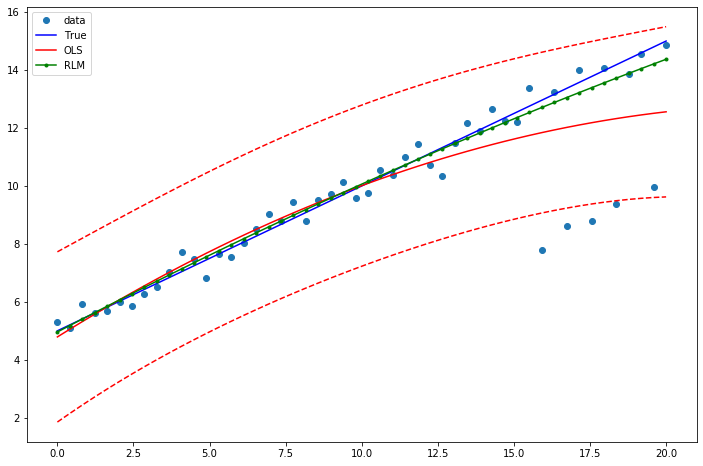

In [14]:
fig = plt.figure(figsize=(12,8))
axis = fig.add_subplot(111)
axis.plot(x1, y2, 'o',label="data")
axis.plot(x1, y_true2, 'b-', label="True")
prstd, iv_l, iv_u = wls_prediction_std(res)
axis.plot(x1, res.fittedvalues, 'r-', label="OLS")
axis.plot(x1, iv_u, 'r--')
axis.plot(x1, iv_l, 'r--')
axis.plot(x1, resrlm.fittedvalues, 'g.-', label="RLM")
axis.legend(loc="best")

In [19]:
X2 = X[:,[0,1]]
res2 = sm.OLS(y2, X2).fit()
print(res2.params)
print(res2.bse)

[5.66137349 0.38844486]
[0.39091061 0.03368244]


In [20]:
resrlm2 = sm.RLM(y2, X2).fit()
print(resrlm2.params)
print(resrlm2.bse)

[5.18149106 0.47764205]
[0.14261539 0.01228832]


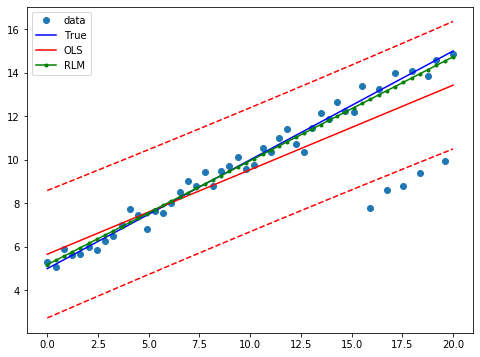

In [22]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, axis = plt.subplots(figsize=(8,6))
axis.plot(x1, y2, 'o', label="data")
axis.plot(x1, y_true2, 'b-', label="True")
axis.plot(x1, res2.fittedvalues, 'r-', label="OLS")
axis.plot(x1, iv_u, 'r--')
axis.plot(x1, iv_l, 'r--')
axis.plot(x1, resrlm2.fittedvalues, 'g.-', label="RLM")
legend = axis.legend(loc="best")